#**a. Data Cleaning**

🔹 Missing Values Before Cleaning:
 Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

✅ Missing Values After Cleaning:
 Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level           

/tmp/ipython-input-1808417970.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Resigned'] = df['Resigned'].replace({True: 1, False: 0}).astype(int)



✅ Target Encoding Map (Performance → Mean Salary/Hour):
{'1': 125.57363806658708, '2': 136.6243880115215, '3': 148.6384606094936, '4': 159.98844764053104, '5': 171.96018484461717}

⚠️ Duplicate Rows Found: 0

✅ Final Dataset Shape: (100000, 24)


,count,mean,min,25%,50%,75%,max,std
Employee_ID,100000.0,50000.5,1.0,25000.75,50000.5,75000.25,100000.0,28867.657797
Age,100000.0,41.02941,22.0,31.0,41.0,51.0,60.0,11.244121
Hire_Date,100000,2019-09-15 06:20:20.916036096,2014-09-07 08:03:05.556036,2017-03-20 08:03:05.556036096,2019-09-21 08:03:05.556036096,2022-03-14 08:03:05.556036096,2024-09-03 08:03:05.556036,NaN
Years_At_Company,100000.0,4.47607,0.0,2.0,4.0,7.0,10.0,2.869336
Monthly_Salary,100000.0,6403.211,3850.0,5250.0,6500.0,7500.0,9000.0,1372.508717
Work_Hours_Per_Week,100000.0,44.95695,30.0,37.0,45.0,53.0,60.0,8.942003
Projects_Handled,100000.0,24.43117,0.0,12.0,24.0,37.0,49.0,14.469584
Overtime_Hours,100000.0,14.51493,0.0,7.0,15.0,22.0,29.0,8.664026
Sick_Days,100000.0,7.00855,0.0,3.0,7.0,11.0,14.0,4.331591
Remote_Work_Frequency,100000.0,50.0905,0.0,25.0,50.0,75.0,100.0,35.351157



📊 Spearman Correlation with Encoded Performance Score:
 Performance_Score_Encoded      1.000000
Monthly_Salary                 0.477761
Salary_Per_Hour                0.356364
Sick_Days                      0.003007
Training_Hours                 0.002362
Remote_Work_Frequency          0.001736
Employee_Satisfaction_Score    0.001690
Years_At_Company               0.001604
Age                            0.001601
Productivity_Ratio             0.001152
Projects_Handled               0.000621
Overtime_Hours                -0.001314
Employee_ID                   -0.002070
Resigned                      -0.002711
Attendance_Rate               -0.003007
Promotions                    -0.003497
Team_Size                     -0.005157
Work_Hours_Per_Week           -0.005626
Name: Performance_Score_Encoded, dtype: float64


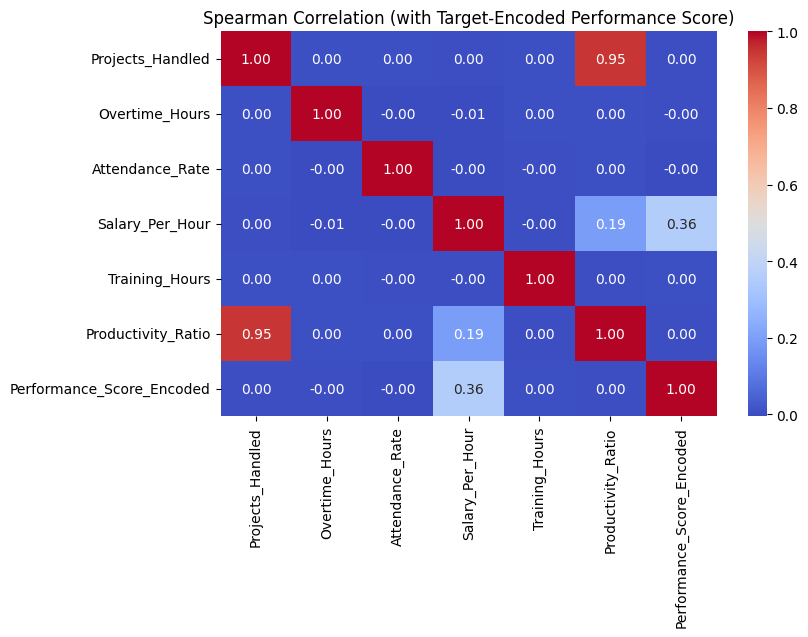

In [ ]:
# ==========================================
# 🧹 DATA CLEANING & PRE-PROCESSING
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. LOAD DATA ---
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIS3044 - Sustainable Information System/Extended_Employee_Performance_and_Productivity_Data.csv')

# --- 2. HANDLE MISSING VALUES ---
print("🔹 Missing Values Before Cleaning:\n", df.isnull().sum())

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Missing Values After Cleaning:\n", df.isnull().sum())

# --- 3. CONVERT DATA TYPES ---
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')
df['Resigned'] = df['Resigned'].replace({True: 1, False: 0}).astype(int)

# --- 4. FEATURE ENGINEERING ---
df['Salary_Per_Hour'] = df['Monthly_Salary'] / df['Work_Hours_Per_Week']
df['Attendance_Rate'] = (1 - (df['Sick_Days'] / 260)) * 100
df['Attendance_Rate'] = df['Attendance_Rate'].clip(0, 100)
df['Productivity_Ratio'] = df['Projects_Handled'] / df['Work_Hours_Per_Week']

if 'Years_At_Company' not in df.columns:
    current_year = pd.Timestamp.now().year
    df['Years_At_Company'] = current_year - df['Hire_Date'].dt.year

# --- 5. TARGET ENCODING FOR PERFORMANCE SCORE ---
# Clean up Performance_Score text
df['Performance_Score'] = df['Performance_Score'].astype(str).str.strip().str.lower()

# Choose a numerical reference (Salary_Per_Hour often works well)
target_reference = 'Salary_Per_Hour'

# Compute mean salary per category
encoding_map = df.groupby('Performance_Score')[target_reference].mean().to_dict()

# Apply the continuous encoding
df['Performance_Score_Encoded'] = df['Performance_Score'].map(encoding_map)

print("\n✅ Target Encoding Map (Performance → Mean Salary/Hour):")
print(encoding_map)

# --- 6. DATA VALIDATION ---
print(f"\n⚠️ Duplicate Rows Found: {df.duplicated().sum()}")
print(f"\n✅ Final Dataset Shape: {df.shape}")
display(df.describe().T.round(2))

# ==========================================
# 🔍 CORRELATION ANALYSIS (SPEARMAN)
# ==========================================

cont_col = 'Performance_Score_Encoded'

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corrs = df[numeric_cols].corr(method='spearman')[cont_col].sort_values(ascending=False)
print("\n📊 Spearman Correlation with Encoded Performance Score:\n", corrs)

# --- Heatmap for key features ---
key_features = [
    'Projects_Handled',
    'Overtime_Hours',
    'Attendance_Rate',
    'Salary_Per_Hour',
    'Training_Hours',
    'Productivity_Ratio',
    'Performance_Score_Encoded'
]

plt.figure(figsize=(8,5))
sns.heatmap(df[key_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation (with Target-Encoded Performance Score)')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA

# Assuming your dataframe is named df and 'Performance_Score_Encoded' is your target

# List categorical and continuous features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Performance_Score_Encoded').tolist()

# One-way ANOVA for Performance_Score_Encoded by each categorical feature
for cat_col in categorical_cols:
    try:
        model = ols(f'Performance_Score_Encoded ~ C({cat_col})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(f'ANOVA results for Performance_Score_Encoded ~ {cat_col}:\n', anova_table, '\n')
    except Exception as e:
        print(f'ANOVA could not be performed for {cat_col}: {e}')

# Multivariate linear regression using all continuous variables
try:
    formula = 'Performance_Score_Encoded ~ ' + ' + '.join(continuous_cols)
    model = ols(formula, data=df).fit()
    print('Multivariate regression summary:\n', model.summary())
except Exception as e:
    print(f'Multivariate regression failed: {e}')

# (Optional) MANOVA if you want to test continuous variables as outcomes and categorical as predictors
# Example: MANOVA with continuous features as dependent variables and Performance_Score as independent group
try:
    if categorical_cols:
        manova_formula = ' + '.join(continuous_cols) + ' ~ ' + f'C({categorical_cols[0]})'
        manova = MANOVA.from_formula(manova_formula, data=df)
        print(f'MANOVA results for continuous variables by {categorical_cols[0]}:\n', manova.mv_test())
except Exception as e:
    print(f'MANOVA failed: {e}')

ANOVA results for Performance_Score_Encoded ~ Department:
                      sum_sq       df         F    PR(>F)
C(Department)  2.086510e+03      8.0  0.966036  0.460458
Residual       2.699591e+07  99991.0       NaN       NaN 

ANOVA results for Performance_Score_Encoded ~ Gender:
                  sum_sq       df        F    PR(>F)
C(Gender)  3.106932e+02      2.0  0.57539  0.562487
Residual   2.699769e+07  99997.0      NaN       NaN 

ANOVA results for Performance_Score_Encoded ~ Job_Title:
                     sum_sq       df        F    PR(>F)
C(Job_Title)  1.372292e+03      6.0  0.84714  0.533237
Residual      2.699663e+07  99993.0      NaN       NaN 

ANOVA results for Performance_Score_Encoded ~ Education_Level:
                           sum_sq       df         F    PR(>F)
C(Education_Level)  1.894278e+03      3.0  2.338858  0.071378
Residual            2.699611e+07  99996.0       NaN       NaN 

ANOVA results for Performance_Score_Encoded ~ Performance_Score:
             

#**b. Tabulated Summary**

In [ ]:
df.describe(include='all')

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Salary_Per_Hour,Attendance_Rate,Productivity_Ratio,Performance_Score_Encoded
count,100000.000000,100000,100000,100000.000000,100000,100000,100000.000000,100000,100000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,9,3,NaN,7,NaN,NaN,4,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Marketing,Male,NaN,Specialist,NaN,NaN,Bachelor,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11216,48031,NaN,14507,NaN,NaN,50041,20120,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,NaN,41.029410,NaN,2019-09-15 06:20:20.916036096,4.476070,NaN,NaN,6403.211000,...,50.090500,10.013560,49.506060,0.999720,2.999088,0.100100,148.504183,97.304404,0.566860,148.504183
min,1.000000,NaN,NaN,22.000000,NaN,2014-09-07 08:03:05.556036,0.000000,NaN,NaN,3850.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,64.166667,94.615385,0.000000,125.573638
25%,25000.750000,NaN,NaN,31.000000,NaN,2017-03-20 08:03:05.556036096,2.000000,NaN,NaN,5250.000000,...,25.000000,5.000000,25.000000,0.000000,2.010000,0.000000,114.705882,95.769231,0.263158,136.624388
50%,50000.500000,NaN,NaN,41.000000,NaN,2019-09-21 08:03:05.556036096,4.000000,NaN,NaN,6500.000000,...,50.000000,10.000000,49.000000,1.000000,3.000000,0.000000,142.187500,97.307692,0.542373,148.638461
75%,75000.250000,NaN,NaN,51.000000,NaN,2022-03-14 08:03:05.556036096,7.000000,NaN,NaN,7500.000000,...,75.000000,15.000000,75.000000,2.000000,3.990000,0.000000,175.531915,98.846154,0.823529,159.988448
max,100000.000000,NaN,NaN,60.000000,NaN,2024-09-03 08:03:05.556036,10.000000,NaN,NaN,9000.000000,...,100.000000,19.000000,99.000000,2.000000,5.000000,1.000000,300.000000,100.000000,1.633333,171.960185


In [ ]:
df.groupby('Department')[['Performance_Score_Encoded','Projects_Handled','Overtime_Hours']].mean().sort_values('Performance_Score_Encoded', ascending=False)

,Performance_Score_Encoded,Projects_Handled,Overtime_Hours
Department,,,
Engineering,148.793742,24.421504,14.593282
Operations,148.636950,24.295144,14.520794
IT,148.557889,24.538945,14.672716
HR,148.526403,24.200912,14.577099
Customer Support,148.524248,24.428661,14.383951
Sales,148.490593,24.707427,14.513757
Legal,148.347696,24.212808,14.548390
Finance,148.334073,24.409375,14.344911
Marketing,148.332544,24.661020,14.482792


In [ ]:
df['Hire_Year'] = df['Hire_Date'].dt.year
df.groupby('Hire_Year')['Performance_Score_Encoded'].mean().reset_index()

,Hire_Year,Performance_Score_Encoded
0,2014,148.260577
1,2015,148.545977
2,2016,148.524319
3,2017,148.419342
4,2018,148.624339
5,2019,148.644879
6,2020,148.498772
7,2021,148.715454
8,2022,148.255929
9,2023,148.404923


#**c. Graphical Analysis by Dimension Variables**

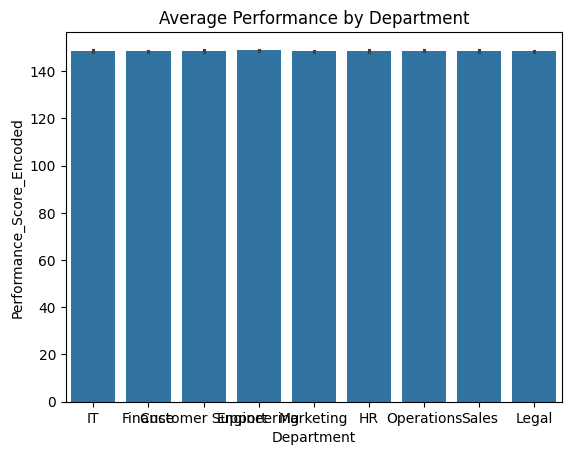

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Department', y='Performance_Score_Encoded', data=df)
plt.title('Average Performance by Department')
plt.show()

<Axes: title={'center': 'Gender Distribution'}, ylabel='count'>

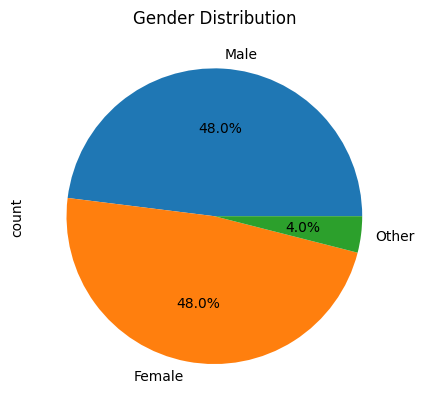

In [ ]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')

Text(0.5, 1.0, 'Age Distribution')

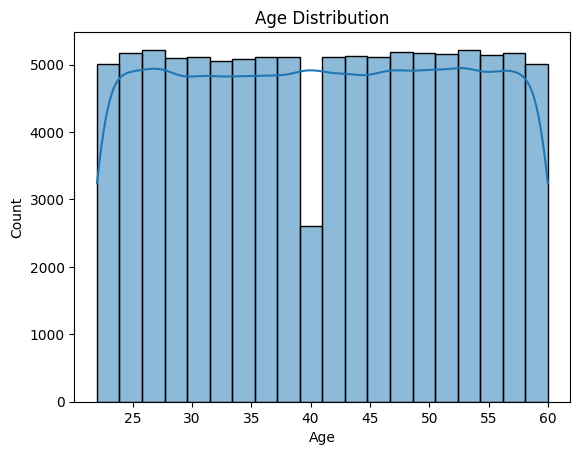

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Education Level Distribution')

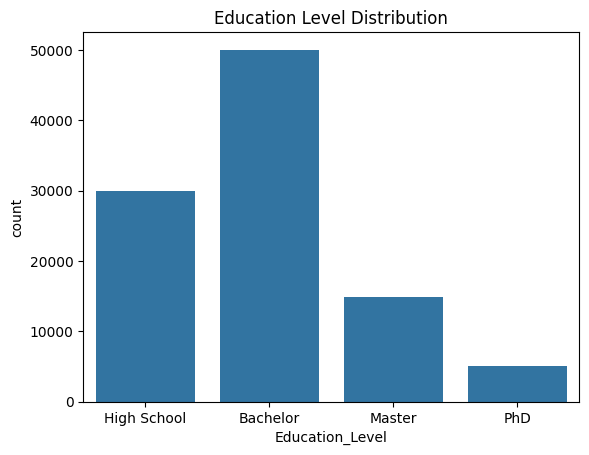

In [ ]:
sns.countplot(x='Education_Level', data=df)
plt.title('Education Level Distribution')

<Axes: title={'center': 'Average Performance by Department'}, xlabel='Department'>

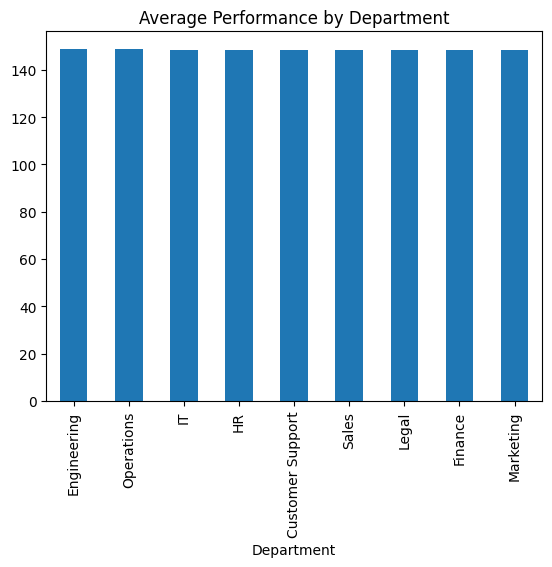

In [ ]:
dept_perf = df.groupby('Department')['Performance_Score_Encoded'].mean().sort_values(ascending=False)
dept_perf.plot(kind='bar', title='Average Performance by Department')

Text(0.5, 1.0, 'Projects vs Performance Score')

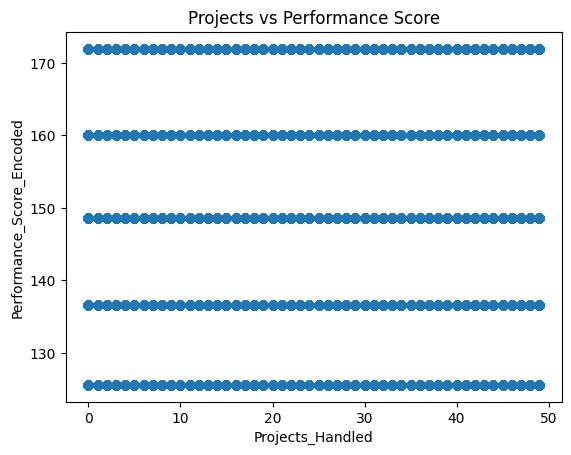

In [ ]:
sns.regplot(x='Projects_Handled', y='Performance_Score_Encoded', data=df)
plt.title('Projects vs Performance Score')

Text(0.5, 1.0, 'Training Hours by Department')

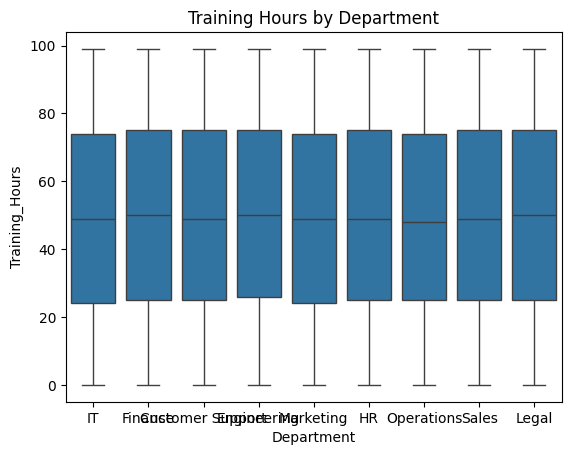

In [ ]:
sns.boxplot(x='Department', y='Training_Hours', data=df)
plt.title('Training Hours by Department')

Text(0.5, 1.0, 'Overtime Patterns among Active vs Resigned Employees')

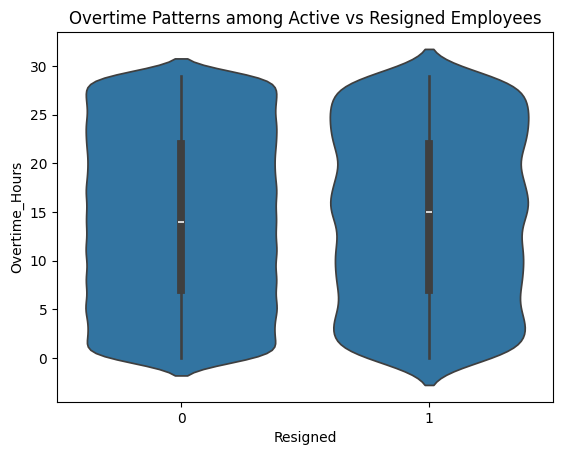

In [ ]:
sns.violinplot(x='Resigned', y='Overtime_Hours', data=df)
plt.title('Overtime Patterns among Active vs Resigned Employees')

Text(0.5, 1.0, 'Salary Distribution by Job Title')

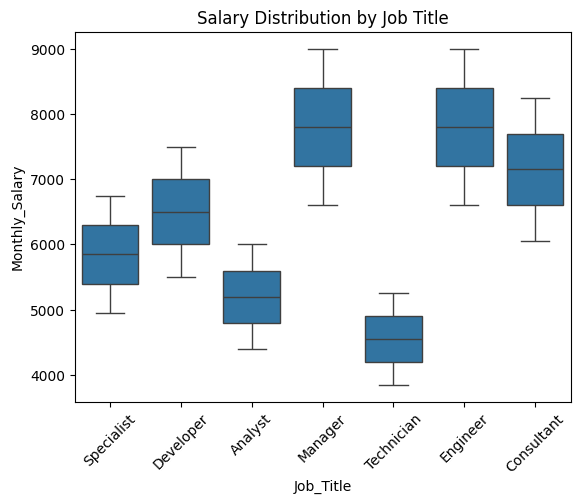

In [ ]:
sns.boxplot(x='Job_Title', y='Monthly_Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Title')

Text(0.5, 1.0, 'Promotions vs Performance')

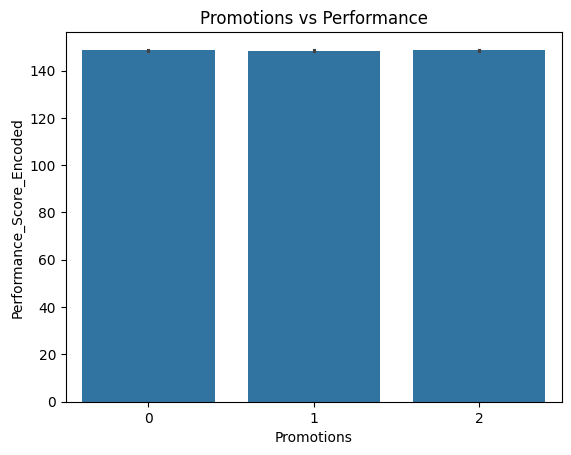

In [ ]:
sns.barplot(x='Promotions', y='Performance_Score_Encoded', data=df)
plt.title('Promotions vs Performance')

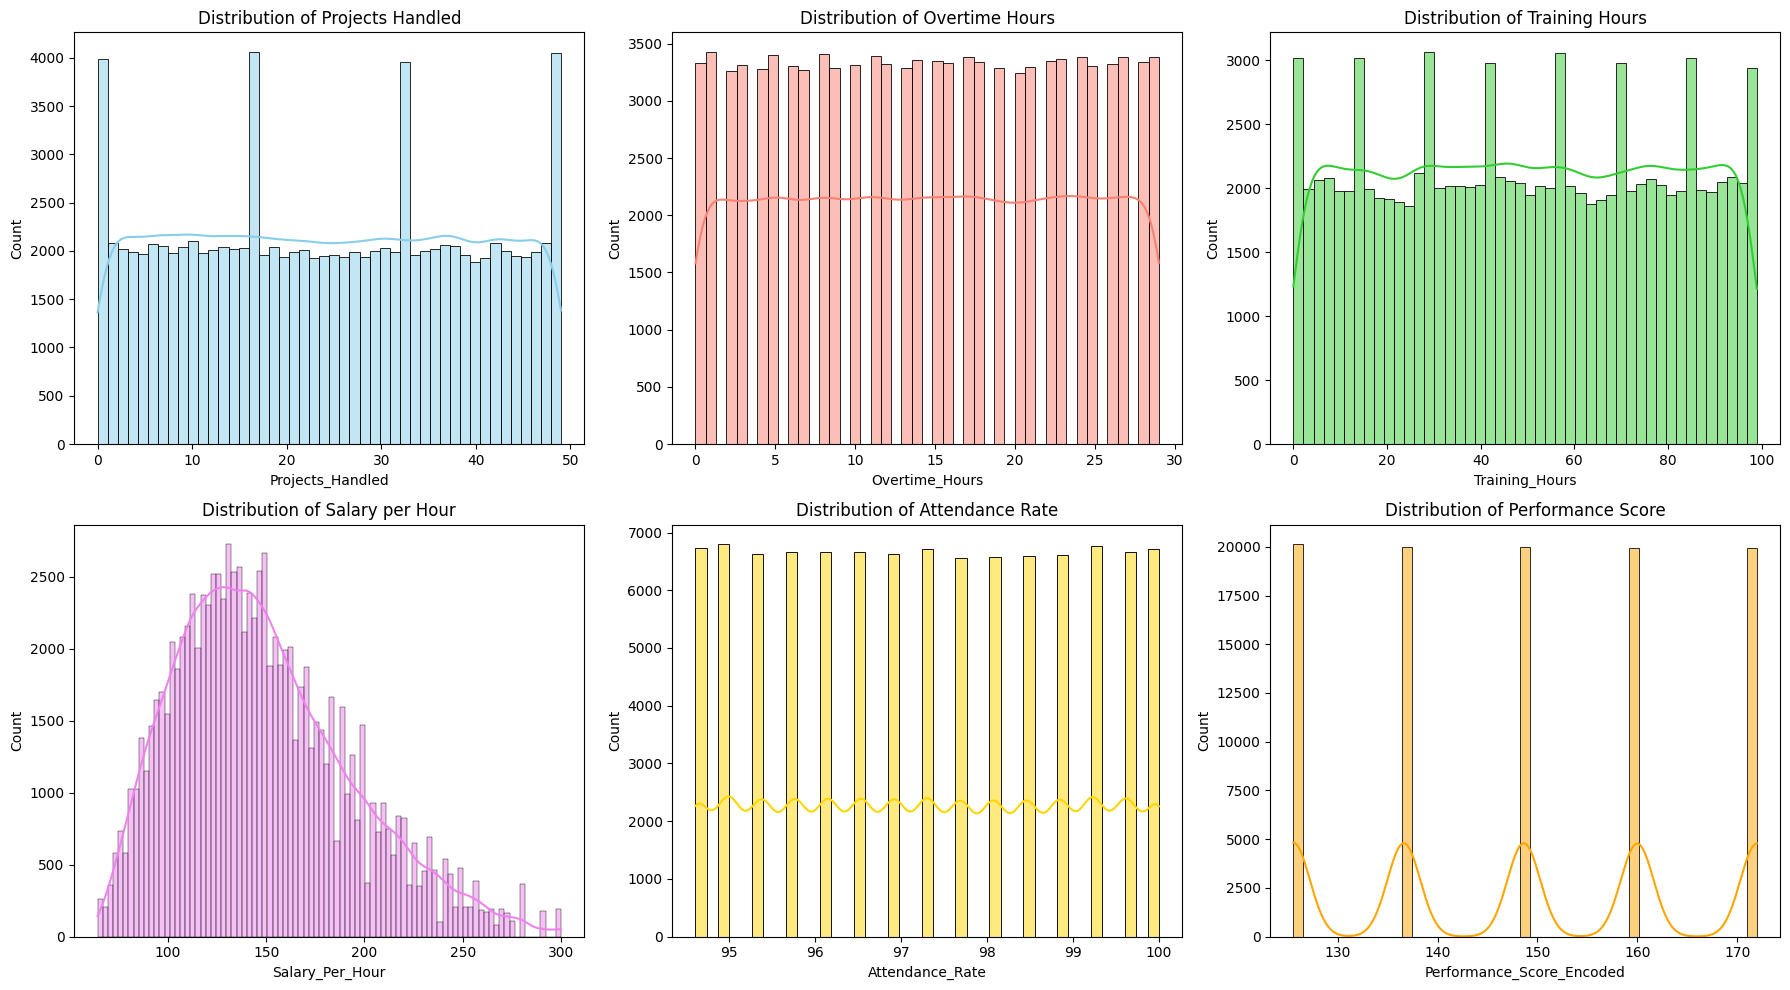

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(df['Projects_Handled'], kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of Projects Handled')

sns.histplot(df['Overtime_Hours'], kde=True, ax=axes[0,1], color='salmon')
axes[0,1].set_title('Distribution of Overtime Hours')

sns.histplot(df['Training_Hours'], kde=True, ax=axes[0,2], color='limegreen')
axes[0,2].set_title('Distribution of Training Hours')

sns.histplot(df['Salary_Per_Hour'], kde=True, ax=axes[1,0], color='violet')
axes[1,0].set_title('Distribution of Salary per Hour')

sns.histplot(df['Attendance_Rate'], kde=True, ax=axes[1,1], color='gold')
axes[1,1].set_title('Distribution of Attendance Rate')

sns.histplot(df['Performance_Score_Encoded'], kde=True, ax=axes[1,2], color='orange')
axes[1,2].set_title('Distribution of Performance Score')

plt.tight_layout()
plt.show()

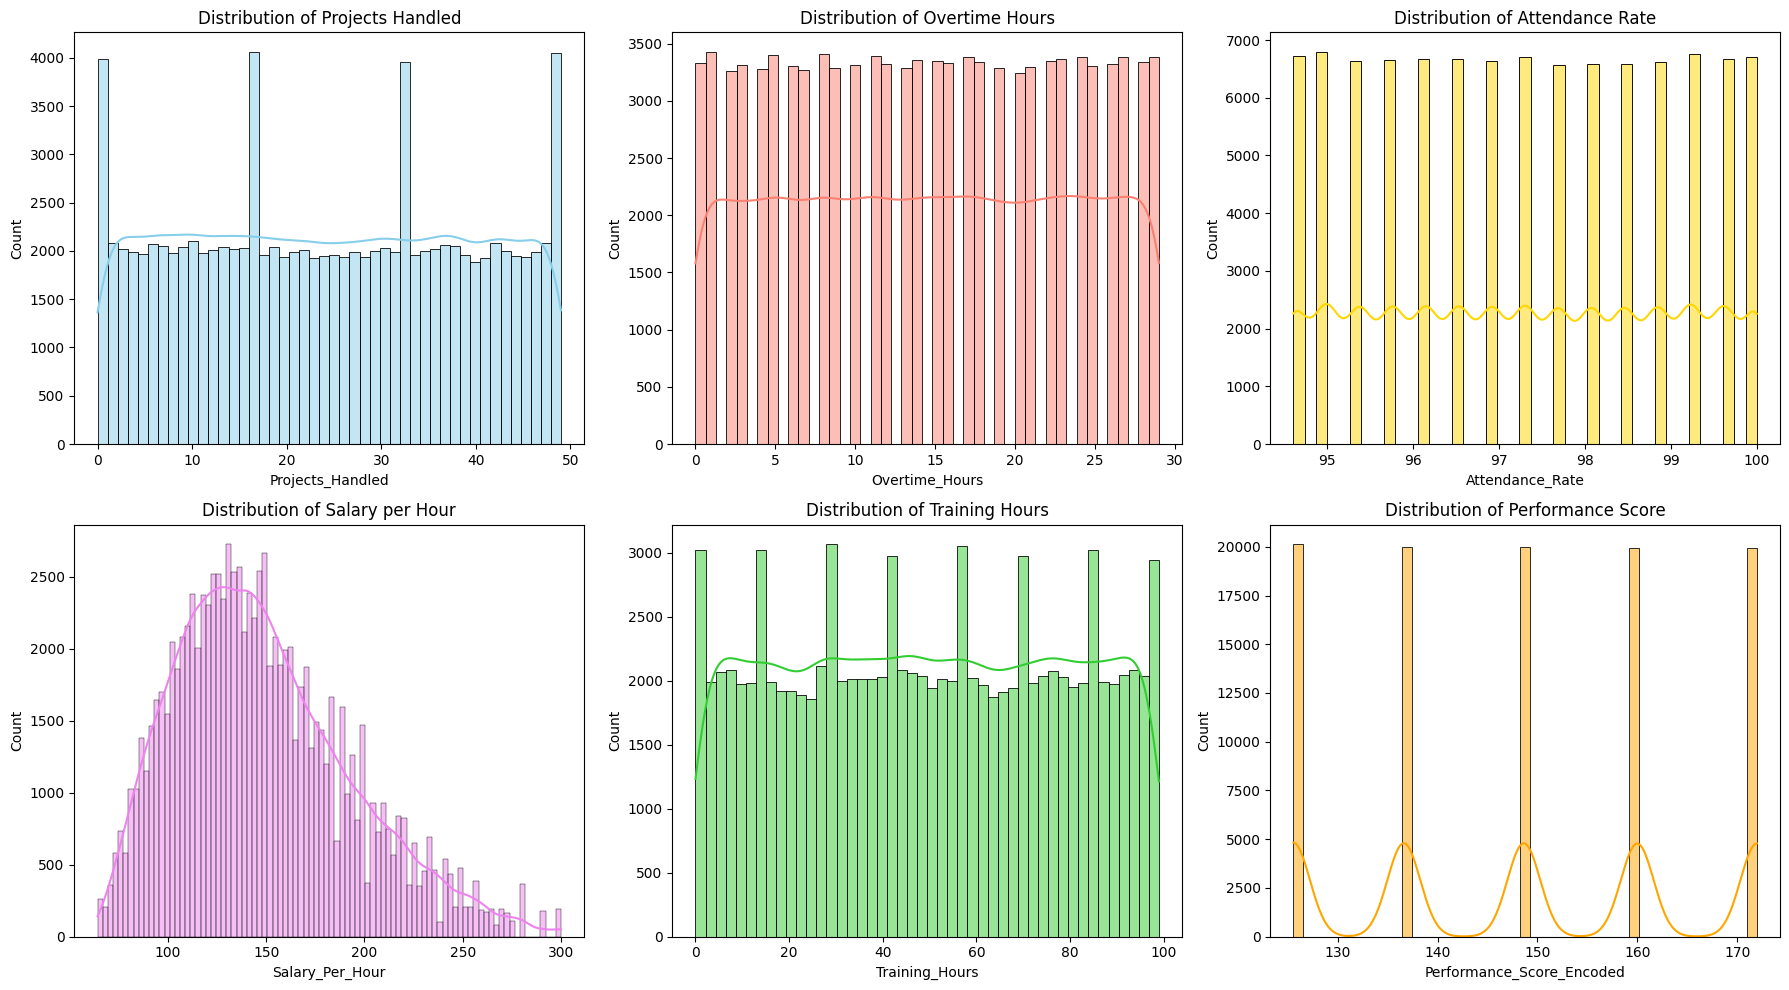

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))

sns.histplot(df['Projects_Handled'], kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of Projects Handled')

sns.histplot(df['Overtime_Hours'], kde=True, ax=axes[0,1], color='salmon')
axes[0,1].set_title('Distribution of Overtime Hours')

sns.histplot(df['Attendance_Rate'], kde=True, ax=axes[0,2], color='gold')
axes[0,2].set_title('Distribution of Attendance Rate')

sns.histplot(df['Salary_Per_Hour'], kde=True, ax=axes[1,0], color='violet')
axes[1,0].set_title('Distribution of Salary per Hour')

sns.histplot(df['Training_Hours'], kde=True, ax=axes[1,1], color='limegreen')
axes[1,1].set_title('Distribution of Training Hours')

sns.histplot(df['Performance_Score_Encoded'], kde=True, ax=axes[1,2], color='orange')
axes[1,2].set_title('Distribution of Performance Score')

plt.tight_layout()
plt.show()

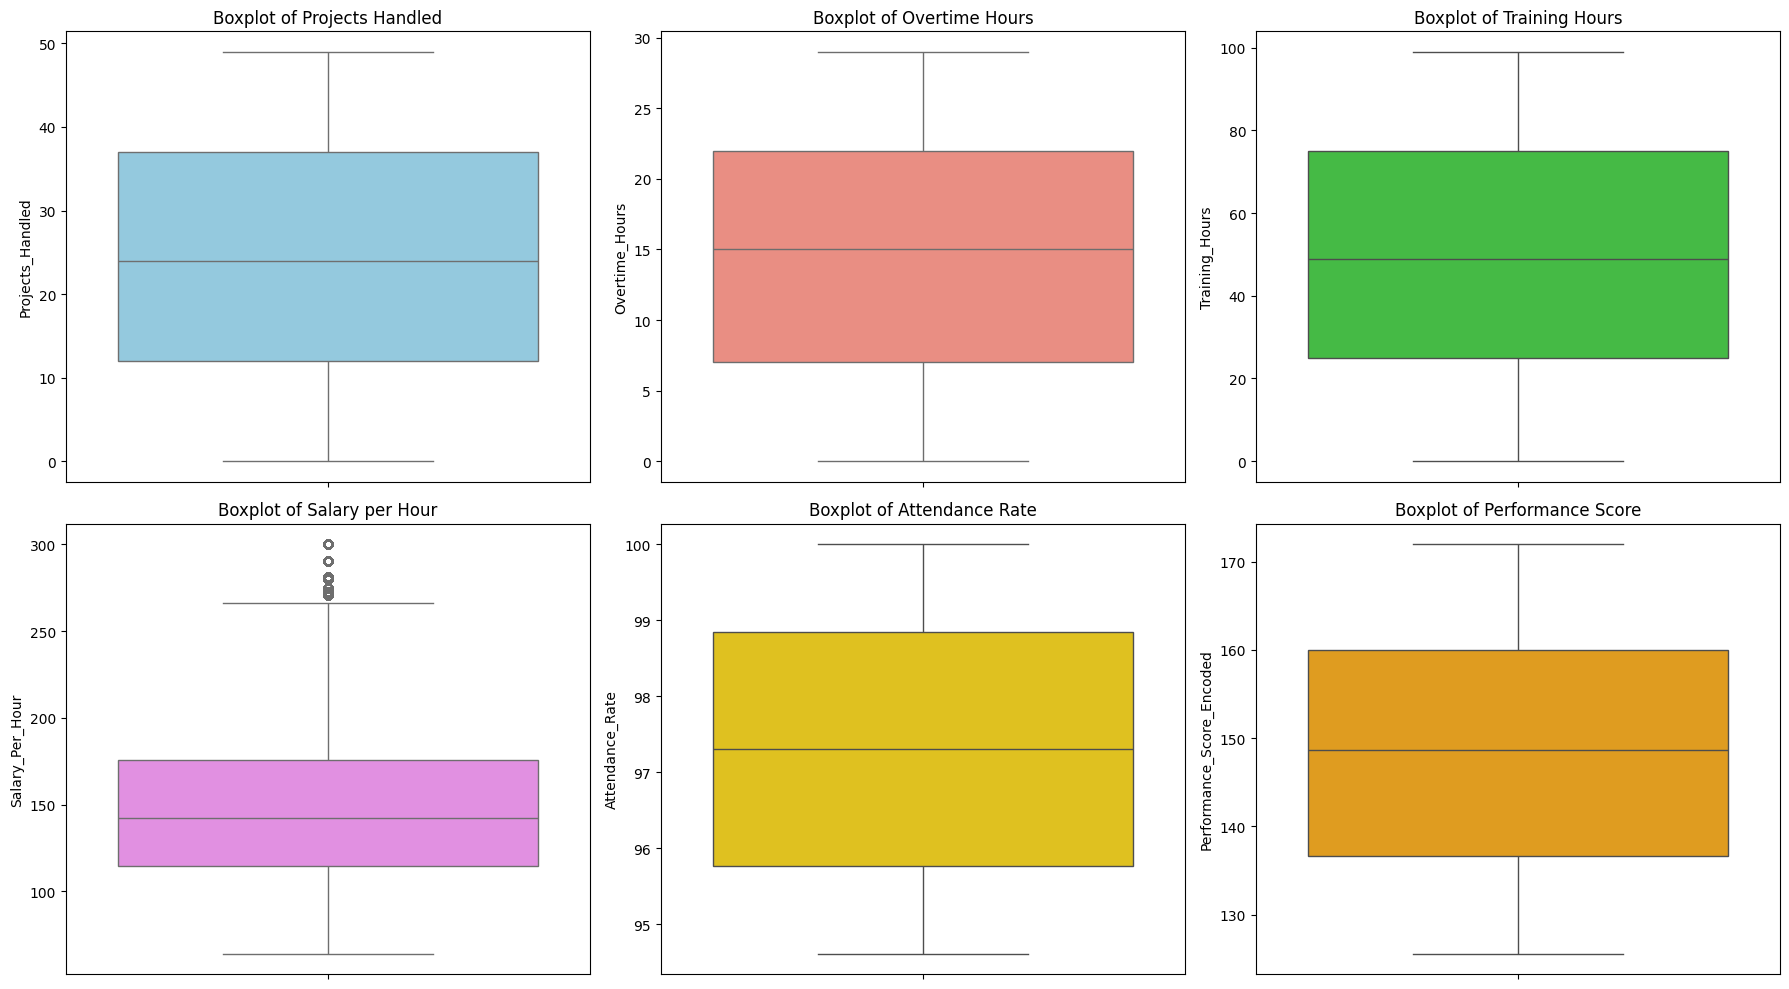

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))

sns.boxplot(y=df['Projects_Handled'], ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Boxplot of Projects Handled')

sns.boxplot(y=df['Overtime_Hours'], ax=axes[0,1], color='salmon')
axes[0,1].set_title('Boxplot of Overtime Hours')

sns.boxplot(y=df['Training_Hours'], ax=axes[0,2], color='limegreen')
axes[0,2].set_title('Boxplot of Training Hours')

sns.boxplot(y=df['Salary_Per_Hour'], ax=axes[1,0], color='violet')
axes[1,0].set_title('Boxplot of Salary per Hour')

sns.boxplot(y=df['Attendance_Rate'], ax=axes[1,1], color='gold')
axes[1,1].set_title('Boxplot of Attendance Rate')

sns.boxplot(y=df['Performance_Score_Encoded'], ax=axes[1,2], color='orange')
axes[1,2].set_title('Boxplot of Performance Score')

plt.tight_layout()
plt.show()

#**d. Graphical Analysis by Time Series**

<Axes: title={'center': 'Number of Hires Over Time'}, xlabel='Hire_Year'>

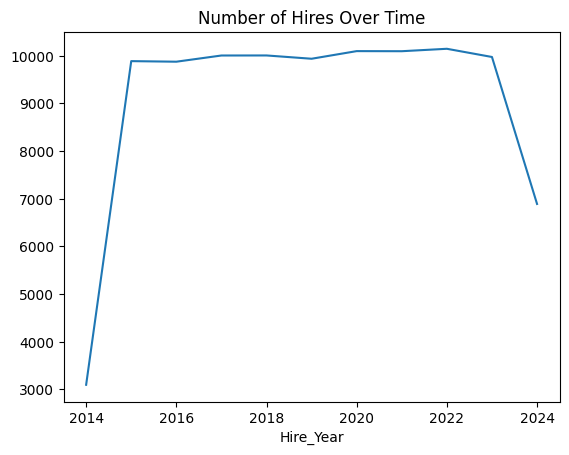

In [ ]:
df['Hire_Year'] = df['Hire_Date'].dt.year
hire_trend = df.groupby('Hire_Year').size()
hire_trend.plot(kind='line', title='Number of Hires Over Time')

<Axes: title={'center': 'Hiring Trend Over Time'}, xlabel='Hire_Year'>

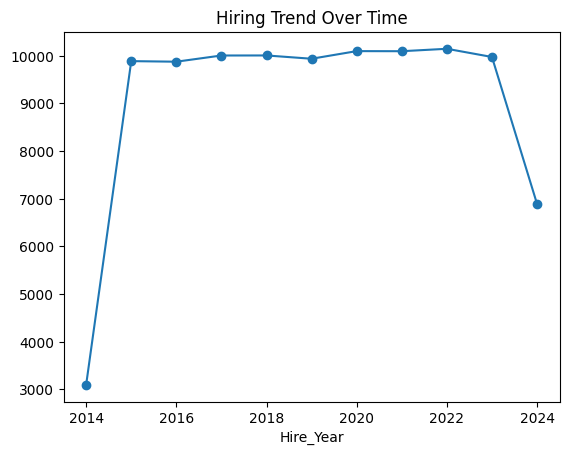

In [ ]:
df['Hire_Year'] = df['Hire_Date'].dt.year
df.groupby('Hire_Year').size().plot(kind='line', marker='o', title='Hiring Trend Over Time')

Text(0.5, 1.0, 'Performance vs Years at Company')

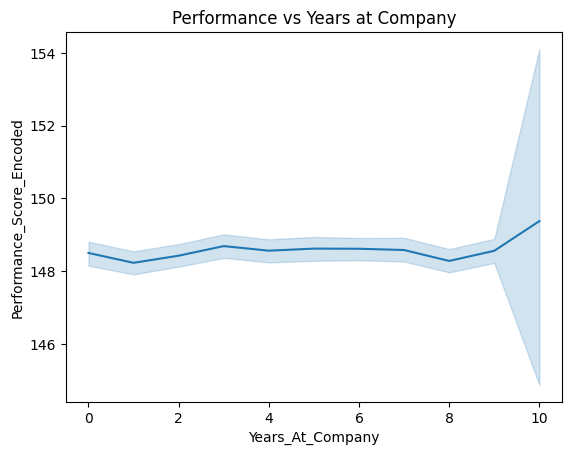

In [ ]:
sns.lineplot(x='Years_At_Company', y='Performance_Score_Encoded', data=df)
plt.title('Performance vs Years at Company')

#**e. Feature Engineering**

In [ ]:
df[['Performance_Score_Encoded', 'Projects_Handled', 'Training_Hours', 'Overtime_Hours', 'Employee_Satisfaction_Score']].corr()

,Performance_Score_Encoded,Projects_Handled,Training_Hours,Overtime_Hours,Employee_Satisfaction_Score
Performance_Score_Encoded,1.000000,0.000577,0.002392,-0.001241,0.001670
Projects_Handled,0.000577,1.000000,0.002211,0.004107,0.006126
Training_Hours,0.002392,0.002211,1.000000,0.002939,-0.001489
Overtime_Hours,-0.001241,0.004107,0.002939,1.000000,0.001052
Employee_Satisfaction_Score,0.001670,0.006126,-0.001489,0.001052,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

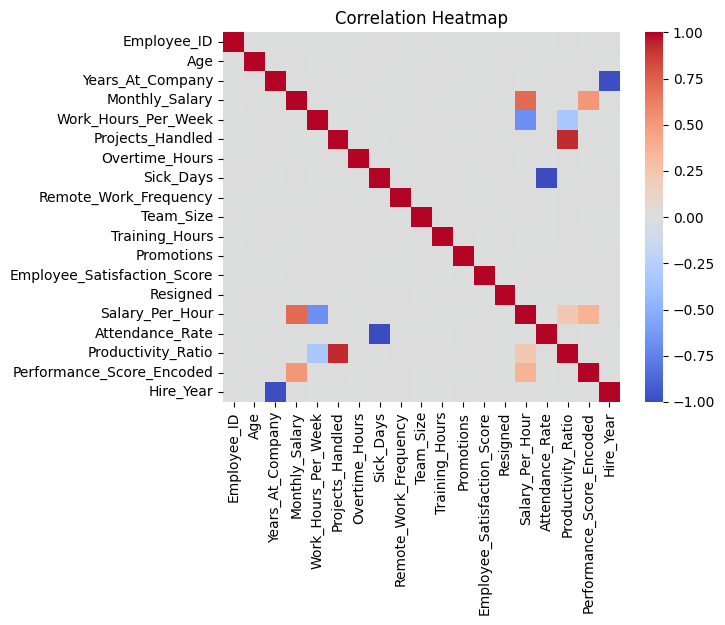

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')

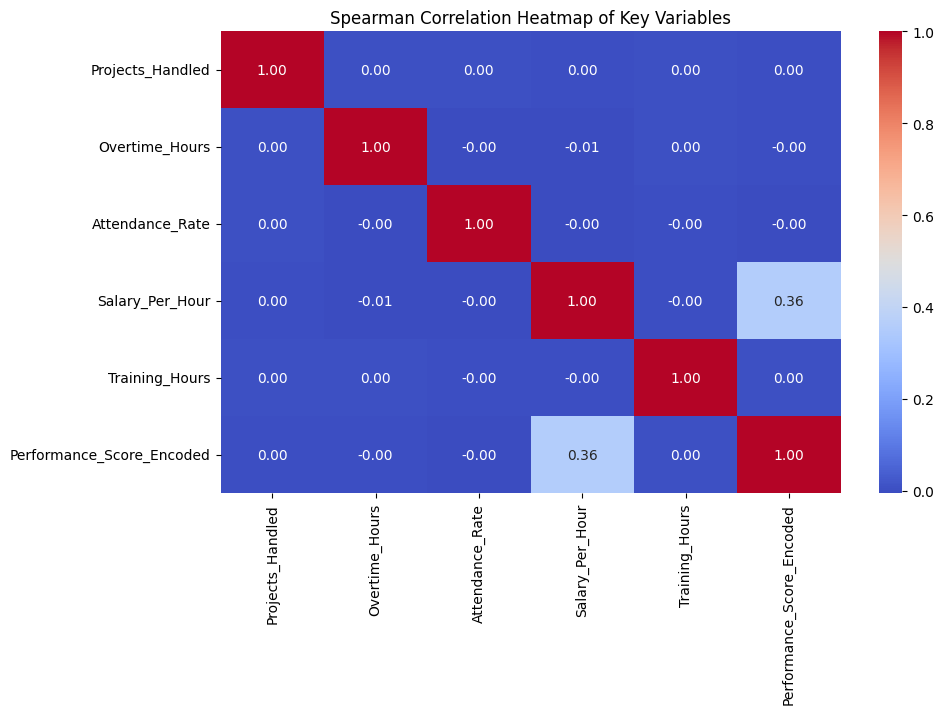

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the key numeric variables
key_vars = ['Projects_Handled','Overtime_Hours','Attendance_Rate',
            'Salary_Per_Hour','Training_Hours','Performance_Score_Encoded']

# Compute Spearman correlation
spearman_corr = df[key_vars].corr(method='spearman')

# Visualize
plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Heatmap of Key Variables')
plt.show()

Text(0.5, 1.0, 'Resignation by Department')

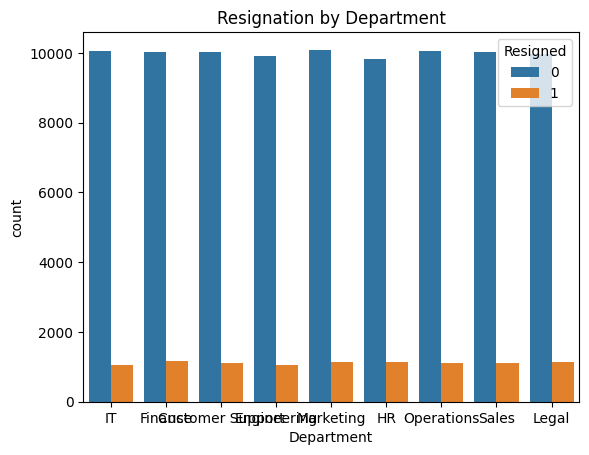

In [ ]:
sns.countplot(x='Department', hue='Resigned', data=df)
plt.title('Resignation by Department')

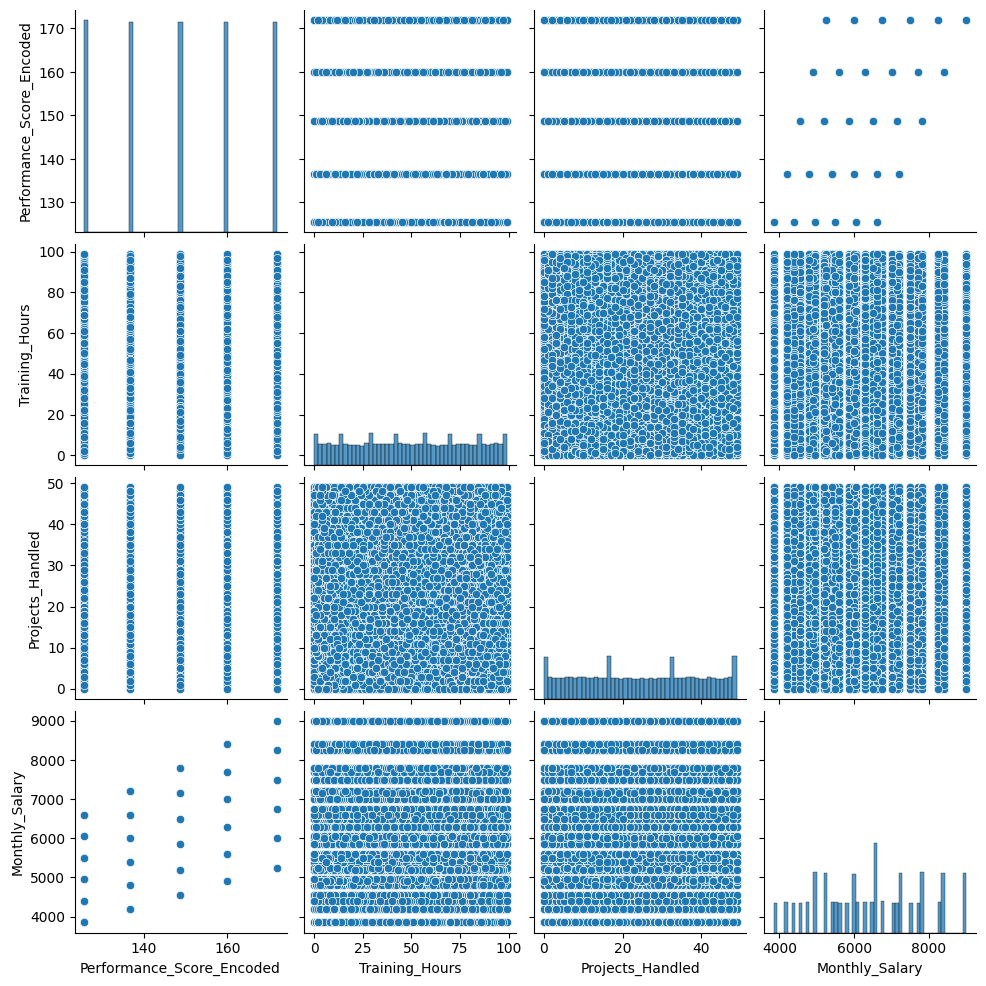

In [ ]:
sns.pairplot(df[['Performance_Score_Encoded', 'Training_Hours', 'Projects_Handled', 'Monthly_Salary']])

In [ ]:
# ==========================================
# 📊 CORRELATION SUMMARY WITH PERFORMANCE SCORE
# ==========================================

import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlations with Performance_Score
correlation_summary = numeric_df.corr(method='spearman')['Performance_Score_Encoded'].sort_values(ascending=False)

# Convert to DataFrame for better display
correlation_table = pd.DataFrame(correlation_summary).reset_index()
correlation_table.columns = ['Variable', 'Correlation_with_Performance_Score']

# Round to 3 decimals
correlation_table['Correlation_with_Performance_Score'] = correlation_table['Correlation_with_Performance_Score'].round(3)

# Display as summary table
print("\n📈 Correlation Summary with Performance Score:")
display(correlation_table)


📈 Correlation Summary with Performance Score:


,Variable,Correlation_with_Performance_Score
0,Performance_Score_Encoded,1.000
1,Monthly_Salary,0.478
2,Salary_Per_Hour,0.356
3,Sick_Days,0.003
4,Training_Hours,0.002
5,Remote_Work_Frequency,0.002
6,Employee_Satisfaction_Score,0.002
7,Years_At_Company,0.002
8,Age,0.002
9,Productivity_Ratio,0.001
